In [6]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
alpaca = tradeapi.REST(
  alpaca_api_key,
  alpaca_secret_key,
  api_version = "v2"
)

In [5]:
# Set the ticker information
tickers = ["MSFT","KO"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

# Get 3 years’ worth of historical price data for Microsoft and Coca-Cola
prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  start=start_date,
  end=end_date,
  limit=limit_rows
).df

# Review the first 5 rows of the DataFrame
prices_df.head()

KO                                    MSFT  \
                            open    high    low   close    volume   open   
time                                                                       
2017-05-01 00:00:00-04:00  43.15  43.500  43.10  43.230  11470244  68.67   
2017-05-02 00:00:00-04:00  43.22  43.440  43.16  43.380   9733052  69.71   
2017-05-03 00:00:00-04:00  43.33  43.485  43.15  43.315   8712620  69.38   
2017-05-04 00:00:00-04:00  43.42  43.810  43.40  43.660   8638866  69.03   
2017-05-05 00:00:00-04:00  43.79  43.840  43.56  43.680   6678133  68.90   

                                                           
                            high     low  close    volume  
time                                                       
2017-05-01 00:00:00-04:00  69.55  68.500  69.43  27119635  
2017-05-02 00:00:00-04:00  69.71  69.130  69.30  19179268  
2017-05-03 00:00:00-04:00  69.38  68.710  69.08  24576064  
2017-05-04 00:00:00-04:00  69.08  68.640  68.81  18561598  
2017-05-05 00:00:00-04:00  69.03  68.485  68.99  15644971

In [8]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
  portfolio_data = prices_df,
  weights = [.60,.40],
  num_simulation = 500,
  num_trading_days = 252*5
)

In [9]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

KO                                   \
                            open    high    low   close    volume   
time                                                                
2017-05-01 00:00:00-04:00  43.15  43.500  43.10  43.230  11470244   
2017-05-02 00:00:00-04:00  43.22  43.440  43.16  43.380   9733052   
2017-05-03 00:00:00-04:00  43.33  43.485  43.15  43.315   8712620   
2017-05-04 00:00:00-04:00  43.42  43.810  43.40  43.660   8638866   
2017-05-05 00:00:00-04:00  43.79  43.840  43.56  43.680   6678133   

                                         MSFT                                  \
                          daily_return   open   high     low  close    volume   
time                                                                            
2017-05-01 00:00:00-04:00          NaN  68.67  69.55  68.500  69.43  27119635   
2017-05-02 00:00:00-04:00     0.003470  69.71  69.71  69.130  69.30  19179268   
2017-05-03 00:00:00-04:00    -0.001498  69.38  69.38  68.710  69.08  24576064   
2017-05-04 00:00:00-04:00     0.007965  69.03  69.08  68.640  68.81  18561598   
2017-05-05 00:00:00-04:00     0.000458  68.90  69.03  68.485  68.99  15644971   

                                        
                          daily_return  
time                                    
2017-05-01 00:00:00-04:00          NaN  
2017-05-02 00:00:00-04:00    -0.001872  
2017-05-03 00:00:00-04:00    -0.003175  
2017-05-04 00:00:00-04:00    -0.003909  
2017-05-05 00:00:00-04:00     0.002616

In [10]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010861,1.000865,0.988338,1.009238,1.010985,1.005991,1.019690,0.989639,1.000204,0.993017,...,0.988574,1.033306,0.988460,1.007356,0.999193,0.978065,1.015698,1.006340,0.992137,1.006102
2,0.991165,1.001843,0.994078,1.015739,1.002469,1.013009,1.036385,0.986373,0.994501,0.996530,...,0.990907,1.041257,0.988031,1.003382,0.989634,0.961137,1.009530,1.017403,0.997761,1.003092
3,0.973038,1.007394,0.988134,1.021296,1.012142,1.012879,1.060238,0.996808,0.980523,0.990432,...,0.988160,1.028333,0.989390,0.975776,0.978045,0.949316,1.004942,1.015873,1.011629,1.002308
4,0.979352,1.009007,1.012798,1.019287,1.000512,1.017574,1.070500,0.988097,0.989902,0.978713,...,0.987808,1.006652,0.985145,0.984828,0.974540,0.958190,1.001784,1.017087,1.012368,0.989174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.367734,1.643966,1.293083,3.964136,2.739368,1.048704,0.836988,1.450432,2.836177,2.329849,...,1.138622,1.532289,2.295275,1.743664,1.362084,1.058977,3.162862,1.202062,1.932996,3.161658
1257,1.366220,1.656658,1.313312,4.072097,2.720955,1.049769,0.850890,1.428708,2.811486,2.307640,...,1.134418,1.551358,2.289946,1.729162,1.346172,1.084614,3.168311,1.230511,1.916002,3.147570
1258,1.392207,1.638841,1.322804,4.015147,2.709086,1.050210,0.845921,1.460331,2.840897,2.316108,...,1.150143,1.534825,2.315948,1.722121,1.354130,1.071388,3.195669,1.239010,1.951825,3.058291
1259,1.369454,1.631851,1.324582,3.943205,2.690287,1.048849,0.855379,1.446038,2.809313,2.339363,...,1.115656,1.518297,2.332428,1.703289,1.364649,1.079501,3.195124,1.233446,1.939643,3.034099


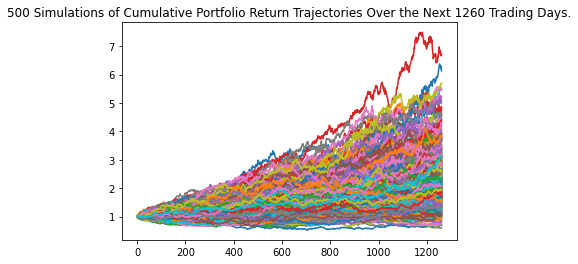

In [11]:
# Plot simulation outcomes
MC_sim_line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future use
MC_sim_line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

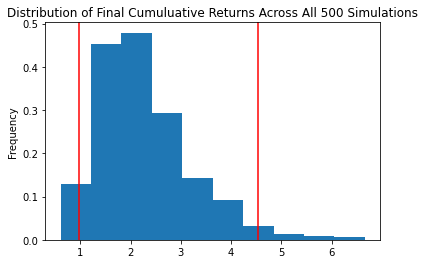

In [12]:
# Plot probability distribution and confidence intervals
MC_sim_dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future use
MC_sim_dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [13]:
# Generate summary statistics from the Monte Carlo simulation
# Set the summary statistics equal to a variable for future use
MC_summary_statistics = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics Series
print(MC_summary_statistics)

count           500.000000
mean              2.276656
std               0.924455
min               0.606035
25%               1.651678
50%               2.109760
75%               2.667328
max               6.663919
95% CI Lower      0.981769
95% CI Upper      4.529378
Name: 1260, dtype: float64


In [14]:
# Using the lower and upper `95%` confidence intervals from the summary statistics,
# calculate the range of the probable cumulative returns for a $10,000 investment
ci_95_lower_cumulative_return = MC_summary_statistics[8] * 10000
ci_95_upper_cumulative_return = MC_summary_statistics[9] * 10000


# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
  f" over the next 5 years will end within in the range of"
  f" ${ci_95_lower_cumulative_return: .2f} and ${ci_95_upper_cumulative_return: .2f}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $ 9817.69 and $ 45293.78.
